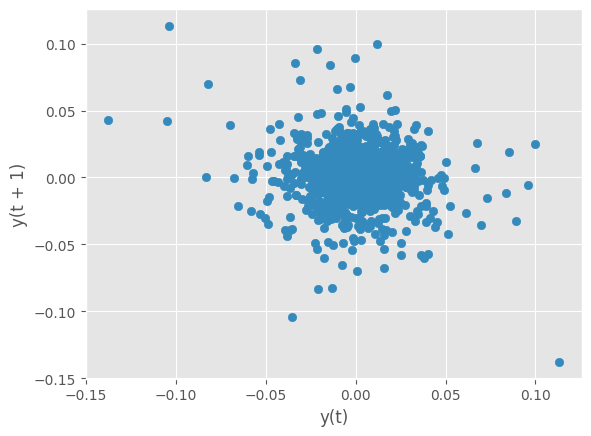

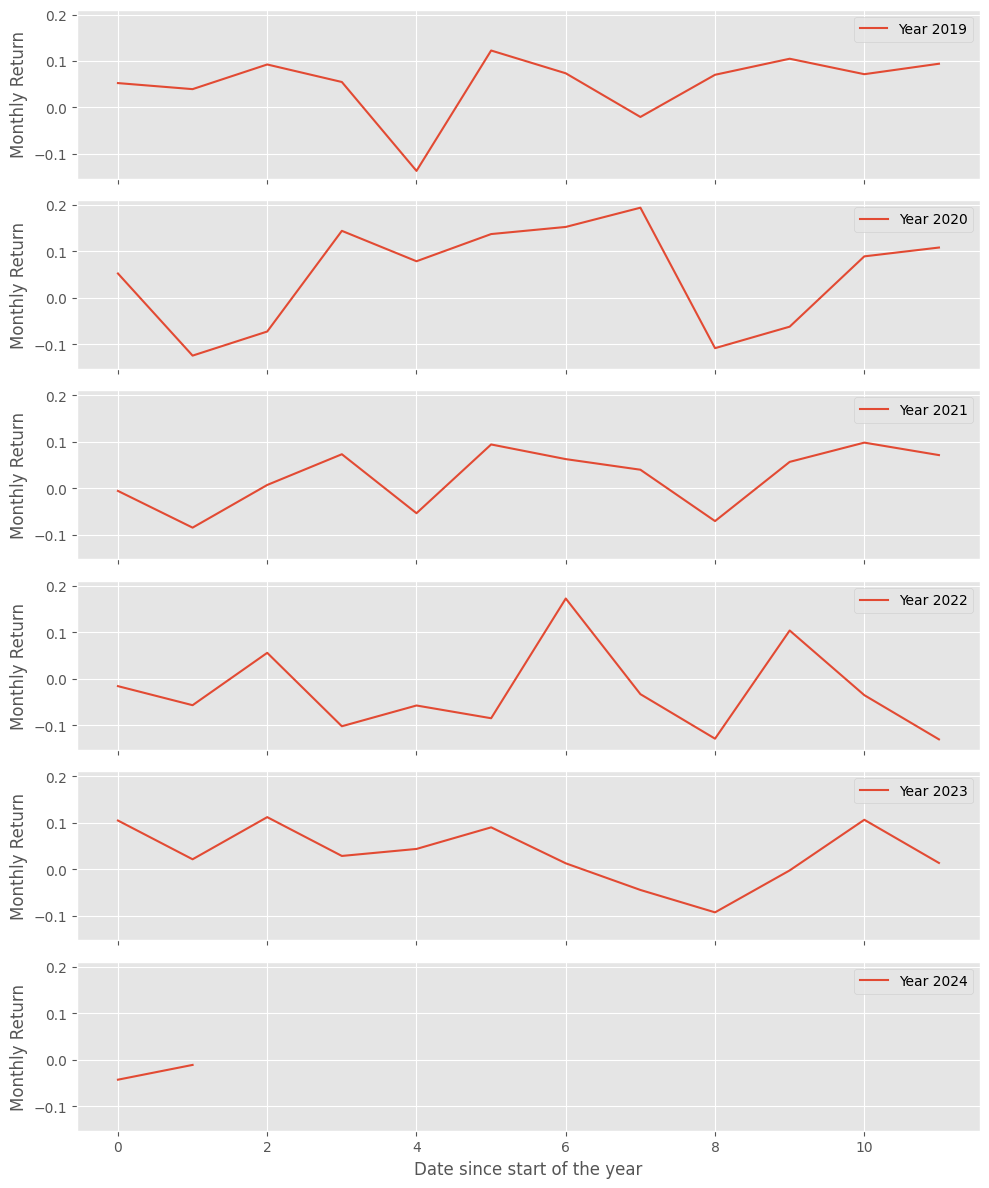

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

df = yf.download('AAPL', start='2019-1-01', progress=False)
df['Return'] = np.log(df['Close']/df['Close'].shift(1))

#df.groupby(pd.Grouper(key='date', freq='M')).sum()
#df['Return'].hist()
pd.plotting.lag_plot(df['Return'])
plt.show()


#Create monthly dataframe
m_df = df.resample('M').sum()
groups = m_df.groupby(pd.Grouper(freq='Y'))
# groups = df.resample('A', on='Date').sum
# Extract the year from the 'Date' column
#df['Year'] = df['Date'].dt.year
years = {}


for name, group in groups:
    # Create a NumPy array for each year
    years[name.year] = group['Return'].values
    # print(type(years[name.year]), years[name.year].size )


# Iterate over groups and plot
fig, axs = plt.subplots(len(groups), 1, figsize=(10, 2*len(groups)), sharex=True, sharey=True)

for i, (year, year_data) in enumerate(years.items()):
    #print(i, year, year_data)
    axs[i].plot(year_data, label=f'Year {year}')
    axs[i].set_ylabel('Monthly Return')
    axs[i].legend()

plt.xlabel('Date since start of the year')
plt.tight_layout()
plt.show()

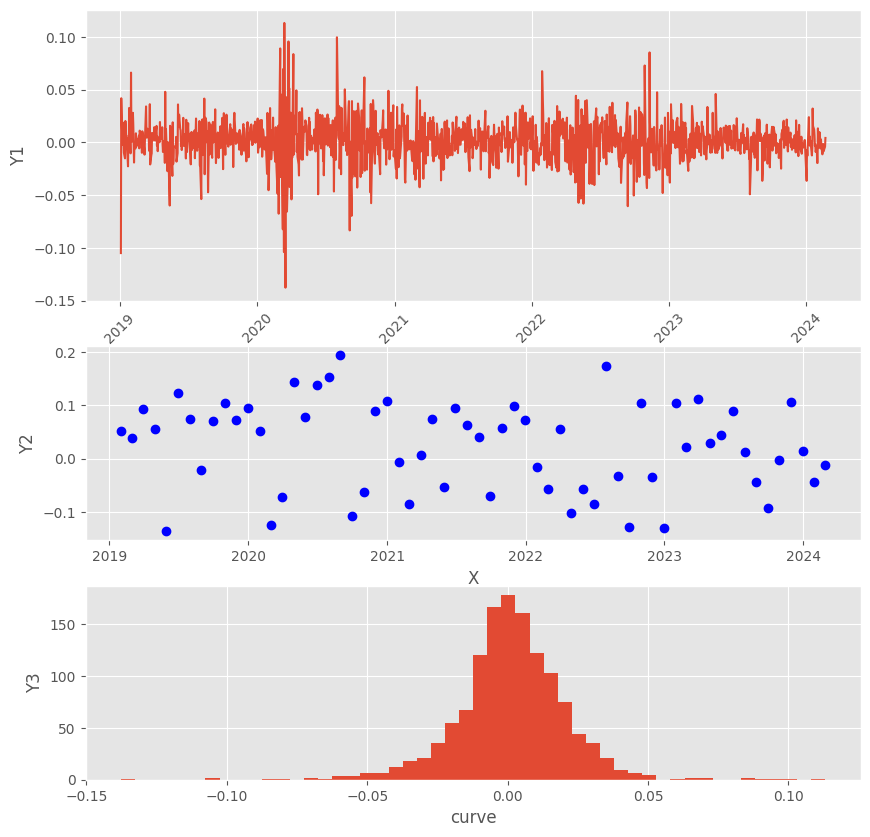

In [121]:

t = np.linspace(-10, 10, 10)
sig = 1 / (1 + np.exp(-t))
           
plt.style.use('ggplot')
#df_m = df.resample('M').last()
# fig, axs = plt.subplots(ncols=1, nrows=3)
fig, (ax1,ax2,ax3) = plt.subplots(ncols=1, nrows=3, figsize=(10, 10), gridspec_kw={'height_ratios': [1.5, 1, 1]})
#ax1, ax2, ax3 = axs.flat
# line chart
ax1.plot(df.index, df['Return'], '-')
# dot chart
ax2.plot(m_df.index, m_df['Return'], 'bo')
#ax3.plot(t, sig, 'o-r')
#when the two "col" has high correlation use 
# ax3.hist2d(df., df['Close'])
ax3.hist(df['Return'], bins = 50)

# Set xlabel and ylabel for each subplot
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y1')

ax2.set_xlabel('X')
ax2.set_ylabel('Y2')

ax3.set_xlabel('curve')
ax3.set_ylabel('Y3')


# Optionally, you can rotate the labels for better visibility in all subplots
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.show()

(array([17532., 17897., 18262., 18628., 18993., 19358., 19723.]),
 [Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024')])

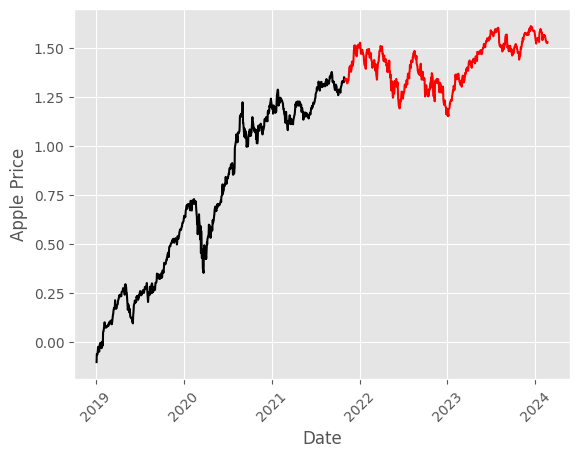

In [124]:
import datetime as dt
import numpy as np
import matplotlib.dates as dates

df['acc_Return'] = df['Return'].cumsum()
train = df[df.index < pd.to_datetime("2021-11-01", format='%Y-%m-%d')]
test = df[df.index > pd.to_datetime("2021-11-01", format='%Y-%m-%d')]

plt.plot(train['acc_Return'], color = "black")
plt.plot(test['acc_Return'], color = "red")
plt.ylabel('Apple Price')
plt.xlabel('Date')
plt.xticks(rotation=45)

#plt.title("Train/Test split for BTC Data")
